## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [17]:
def intFactorial(N):
    for i in range(1,N-1):
        N *= (i+1)
    return(N)

print(intFactorial(200))

def floatFactorial(N):
    for i in range(1,N-1):
        N *= float(i+1)
    return(N)

print(floatFactorial(200))

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
inf


Finding the factorial using integer numbers works just fine, but when using floating point numbers it errors out and just returns infinity. This is due to the fact that for very large numbers, the floating point calculation starts to be off which leads to the loss of important digits.

**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [18]:
def function(x):
    return(x * (x - 1))
def derivative(x,delta):
    return((function(x + delta) - function(x)) / delta)

print(derivative(1,1e-2))

1.010000000000001


The true value of the derivative analytically is 1. This is close to the value calculated using the method about but not quite the same. This is due to the real definition of a derivative involves a limit as delta goes to zero, but since we can only make delta small we will not get a fully acurate value.

In [19]:
print(derivative(1,1e-4))
print(derivative(1,1e-6))
print(derivative(1,1e-8))
print(derivative(1,1e-10))
print(derivative(1,1e-12))
print(derivative(1,1e-14))

1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [2]:
def integrand(x):
    return((x**4 - 2*x + 1))

def simpson(a,b,N):
    h = (b-a)/N
    s = (integrand(a)+integrand(b))
    t = 0
    for i in range(2,N,2):
        s += 2 * integrand(a + i*h)
    for i in range(1,N,2):
        t += 2/3 * integrand(a + i*h)
    return (h* (1/3 * s + 2*t))

print("Simpson's rule with 10 slices:",simpson(0,2,10))
print("Simpson's rule with 100 slices:",simpson(0,2,100))
print("Simpson's rule with 1000 slices:",simpson(0,2,1000))

Simpson's rule with 10 slices: 4.400426666666667
Simpson's rule with 100 slices: 4.400000042666667
Simpson's rule with 1000 slices: 4.400000000004267


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
xvals = np.arange(0,3,0.1)

def integrand(t):
    return(np.exp(-t**2))

def simpson(a,b,N):
    h = (b-a)/N
    s = (integrand(a)+integrand(b))
    t = 0
    for i in range(2,N,2):
        s += 2 * integrand(a + i*h)
    for i in range(1,N,2):
        t += 2/3 * integrand(a + i*h)
    return (h* (1/3 * s + 2*t))

print(simpson(0,xvals,1000))

[0.         0.09966766 0.19736503 0.29123788 0.37965284 0.46128101
 0.53515353 0.60068567 0.65766986 0.70624151 0.74682413 0.78006143
 0.80674476 0.82774299 0.84394071 0.85618839 0.86526623 0.87186159
 0.87655863 0.87983761 0.88208139 0.88358644 0.88457602 0.88521381
 0.88561675 0.88586627 0.88601775 0.88610788 0.88616045 0.8861905 ]


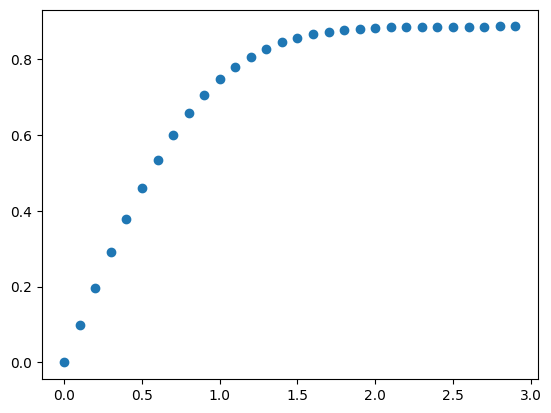

In [10]:
plt.scatter(xvals,simpson(0,xvals,1000))